# PLOTNINE

plotnine is based on ggplot2. ggplot2 is a data visualization package for the statistical programming language R. ggplot2 is an implementation of grammar of graphics.

# IMPORTS
for more information on packages and install instructions, visit the python package index and search for package of interest

In [2]:
import plotnine
from plotnine import ggplot, aes
import pandas as pd

# data sources
from plotnine.data import mtcars
from vega_datasets import data as vds
from pydataset import data as pyds

# package for plot scales
from mizani.formatters import comma_format # (thousands seperator format)

import ipywidgets

import warnings
warnings.filterwarnings('ignore')

# NOTES

* aes (aesthetics) used to create new ggplot object and at geom level
* labs (labels)
* use qplot (quick plot) to create simple quick plots - plotnine.qplot()
* themes are a way to customize the non-data components of your plots: i.e. titles, labels, fonts, background, gridlines, and legends
* there is also a python package ggplot - see python package index for details

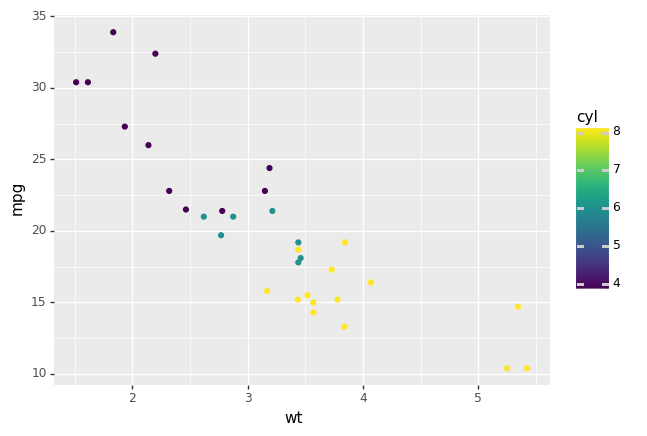

In [3]:
# qplot example
plotnine.qplot(x='wt', y='mpg', data=plotnine.data.mtcars, color='cyl').draw();

# PATTERN TO CREATE PLOTS

## create new ggplot object

plot = ggplot(data=, mapping=aes(x='', y=''))

## add layers

#### draw not needed (displays plot without extra text, etc.)

(plot + layers).draw();

# LINE PLOT

In [4]:
# data
stocks = vds.stocks()
stocks_MSFT = stocks[stocks['symbol'] == 'MSFT']
stocks_AMZN = stocks[stocks['symbol'] == 'AMZN']
stocks_IBM = stocks[stocks['symbol'] == 'IBM']
stocks_GOOG = stocks[stocks['symbol'] == 'GOOG']
stocks_AAPL = stocks[stocks['symbol'] == 'AAPL']
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


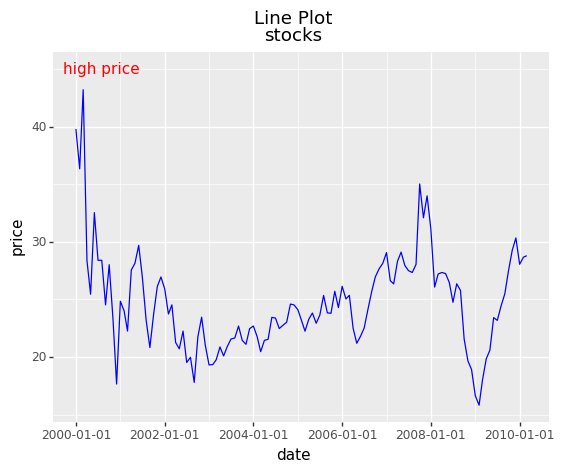

In [5]:
# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data=stocks_MSFT, mapping=aes(x='date', y='price'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='blue') + 
 # labels
 plotnine.labs(title='Line Plot\nstocks') +
 # add annotation to plot
 plotnine.annotate('text', x=pd.Timestamp('2000-08-01'), y=45, label='high price', color='red')).draw();

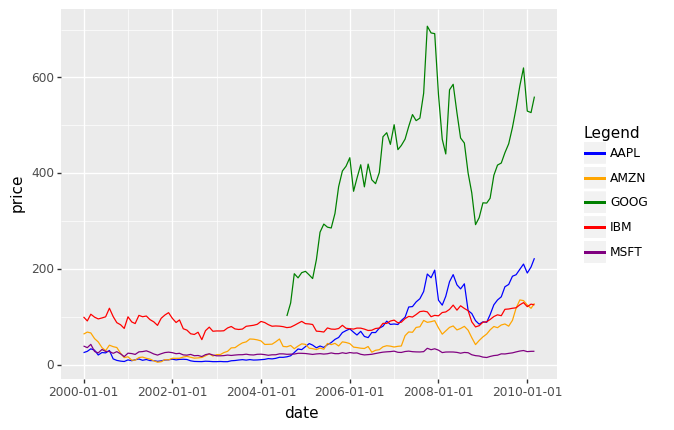

In [6]:
# line chart with multiple lines and legend
(ggplot() + 
 plotnine.geom_line(data=stocks_AAPL, mapping=aes(x='date', y='price', color="'blue'")) +
 plotnine.geom_line(data=stocks_AMZN, mapping=aes(x='date', y='price', color="'orange'")) +
 plotnine.geom_line(data=stocks_GOOG, mapping=aes(x='date', y='price', color="'green'")) +
 plotnine.geom_line(data=stocks_IBM, mapping=aes(x='date', y='price', color="'red'")) +
 plotnine.geom_line(data=stocks_MSFT, mapping=aes(x='date', y='price', color="'purple'")) +
 plotnine.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange','green','red','purple'],
                               labels=['AAPL','AMZN','GOOG','IBM','MSFT'])).draw();

# SAVE PLOT

In [7]:
df = pd.DataFrame({'x': [1,2,3,4,5,6,7,8,9,10],
                   'y': [1,3,2,1,4,5,3,6,7,5]})

p = (ggplot(data=df, mapping=aes(x='x', y='y')) + plotnine.geom_line())
# p.save(filename='path/file_name.png')

# BAR PLOT

In [8]:
# data
Arthritis = pyds('Arthritis')
Arthritis.head()

,ID,Treatment,Sex,Age,Improved
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked


In [9]:
# '~Treatment' for facet grid with columns
# 'Treatment~' for facet grid with rows
# 'Treatment ~ Sex' for facet grid with columns and rows

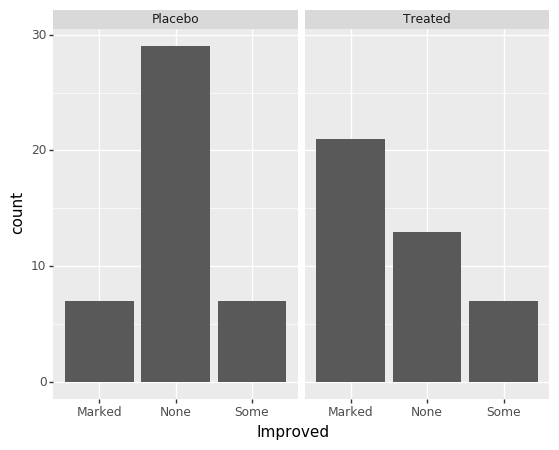

In [10]:
# create new ggplot object
bar_plot = ggplot(data=Arthritis, mapping=aes(x='Improved'))

# add layers
(bar_plot + 
 plotnine.geom_bar() + 
 plotnine.facet_grid('~Treatment')).draw();

In [11]:
movies = vds.movies()
movies.sort_values(by='Worldwide Gross', ascending=False).head(3)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
1234,Avatar,760167650.0,2.767891e+09,146153933.0,237000000.0,Dec 18 2009,PG-13,NaN,20th Century Fox,Original Screenplay,Action,Science Fiction,James Cameron,83.0,8.3,261439.0
2970,Titanic,600788188.0,1.842880e+09,NaN,200000000.0,Dec 19 1997,PG-13,194.0,Paramount Pictures,Original Screenplay,Thriller/Suspense,Historical Fiction,James Cameron,82.0,7.4,240732.0
2202,The Lord of the Rings: The Return of the King,377027325.0,1.133027e+09,NaN,94000000.0,Dec 17 2003,PG-13,201.0,New Line,Based on Book/Short Story,Adventure,Fantasy,Peter Jackson,NaN,8.8,364077.0


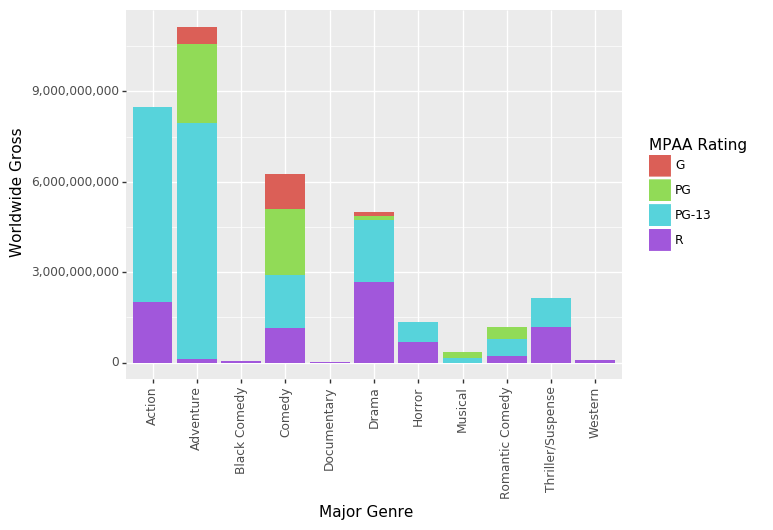

In [12]:
# geom_col stacked bar example using rating, adding thousands separator to y axis, rotate x axis label
# comma_format uses mizani package
(plotnine.ggplot(data=movies.dropna(), mapping=aes(x='Major Genre', y='Worldwide Gross', fill='MPAA Rating')) + 
 plotnine.geom_col() +
 plotnine.scale_y_continuous(labels=comma_format()) +
 plotnine.theme(axis_text_x=plotnine.element_text(rotation=90))).draw();

In [13]:
# data
cars = vds.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Origin
Europe    27.602941
Japan     30.450633
USA       20.033469
Name: Miles_per_Gallon, dtype: float64


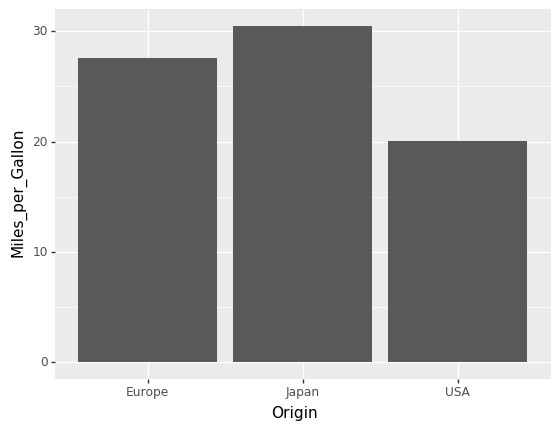

In [14]:
# example showing mean mpg by origin
(ggplot(cars.dropna(), aes(x='Origin', y='Miles_per_Gallon')) +
 plotnine.stat_summary(geom='bar')).draw();

print(cars.dropna().groupby('Origin')['Miles_per_Gallon'].mean())

# SCATTER PLOT

In [15]:
cars.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


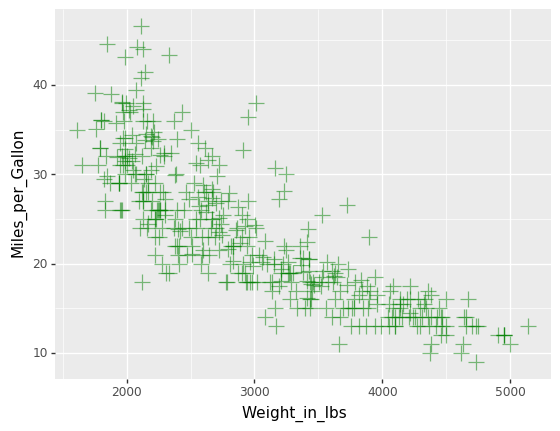

In [16]:
# create new ggplot object
scatter_plot = ggplot(data=cars.dropna(), mapping=aes(x='Weight_in_lbs', y='Miles_per_Gallon'))

# add layers
(scatter_plot + 
 plotnine.geom_point(shape='+', size=6, color='green', alpha=0.5)).draw();

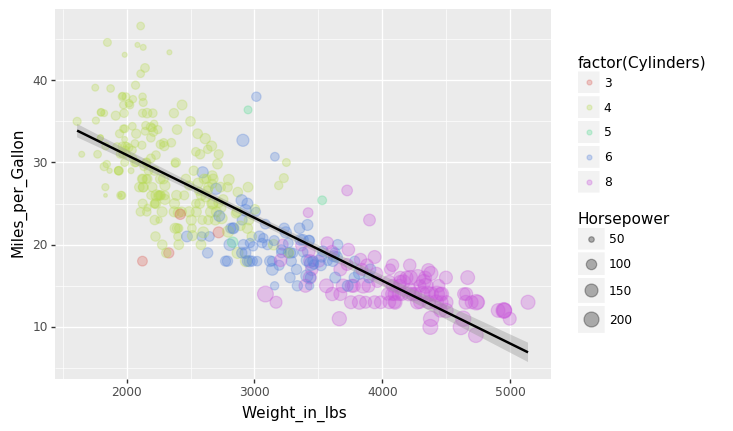

In [17]:
# create new ggplot object
# map cylinders to color scheme and horsepower to size
scatter = ggplot(data=cars.dropna(), mapping=aes(x='Weight_in_lbs', y='Miles_per_Gallon'))

# add layers
(scatter + 
 plotnine.geom_point(aes(color='factor(Cylinders)', size='Horsepower'), alpha=0.3) +
 plotnine.stat_smooth(method='lm')).draw();

# HISTOGRAM

In [18]:
# measurements for black cherry trees
trees = pyds('trees')
trees.tail()

,Girth,Height,Volume
27,17.5,82,55.7
28,17.9,80,58.3
29,18.0,80,51.5
30,18.0,80,51.0
31,20.6,87,77.0


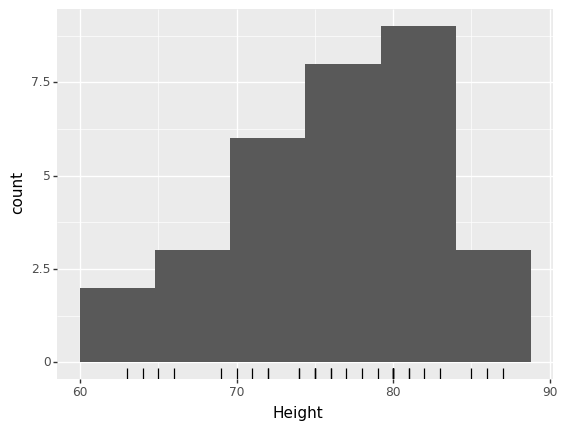

In [19]:
# create new ggplot object
histogram = ggplot(data=trees, mapping=aes(x='Height'))

# add layers
(histogram +
 plotnine.geom_histogram(bins=6) +
 plotnine.geom_rug()).draw();

# KDE

In [20]:
# data
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


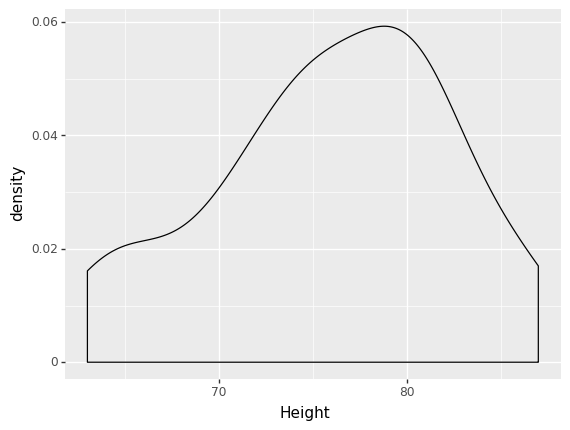

In [21]:
# create new ggplot object
kde = ggplot(data=trees, mapping=aes(x='Height'))

# add layers
(kde + plotnine.geom_density()).draw();

# BOXPLOT

In [22]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


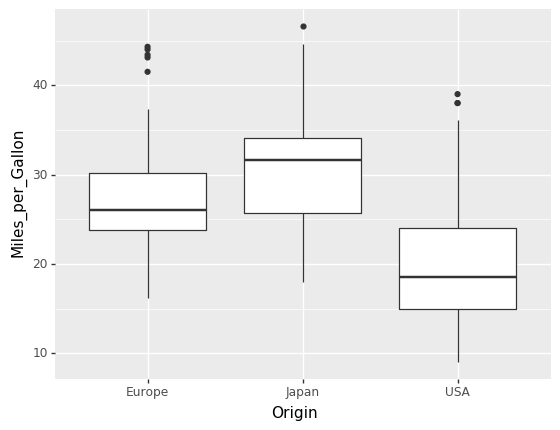

In [23]:
# create new ggplot object
boxplot = ggplot(data=cars.dropna(), mapping=aes(x='Origin', y='Miles_per_Gallon'))

# add layers
(boxplot + 
 plotnine.geom_boxplot()).draw();

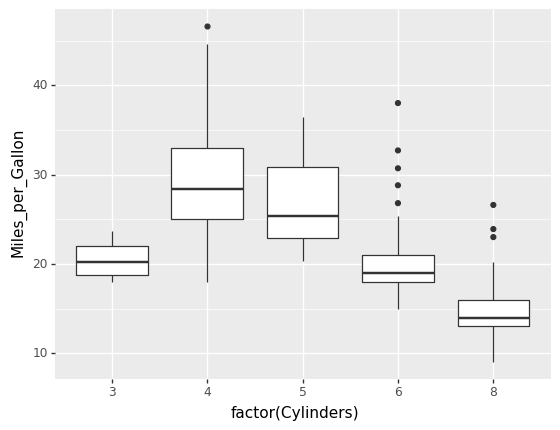

In [24]:
# example using factor (boxplot for each cylinder type)
(ggplot(data=cars.dropna(), mapping=aes(x='factor(Cylinders)', y='Miles_per_Gallon')) +
 plotnine.geom_boxplot()).draw();

# VIOLIN PLOT

In [25]:
# data
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


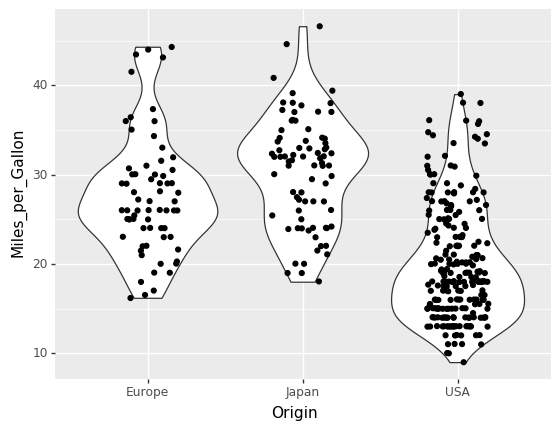

In [26]:
# create new ggplot object
violin_plot = ggplot(data=cars.dropna(), mapping=aes(x='Origin', y='Miles_per_Gallon'))

# add layers
(violin_plot + 
 plotnine.geom_violin() +
 # scatter plot with points jittered to reduce overplotting (similar to seaborn stripplot)
 plotnine.geom_jitter(position=plotnine.position_jitter(0.2))).draw();

# HEATMAP

In [27]:
# data
cars_vars=['Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration']
cars_corr = cars.copy().dropna().corr()
melt_cars_corr = (cars_corr.rename_axis(index='V1')
                  .reset_index()
                  .melt(id_vars='V1', var_name='V2'))

melt_cars_corr = melt_cars_corr.round(decimals=2)

melt_cars_corr.head()

,V1,V2,value
0,Miles_per_Gallon,Miles_per_Gallon,1.00
1,Cylinders,Miles_per_Gallon,-0.78
2,Displacement,Miles_per_Gallon,-0.81
3,Horsepower,Miles_per_Gallon,-0.78
4,Weight_in_lbs,Miles_per_Gallon,-0.83


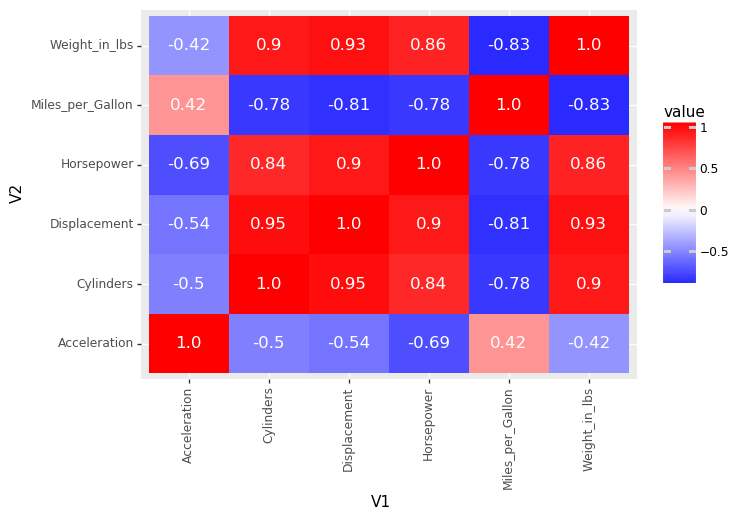

In [28]:
# create new ggplot object
plot = ggplot(data=melt_cars_corr, mapping=aes(x='V1', y='V2', fill='value'))

# add layers
(plot + 
 plotnine.geom_tile() +
 plotnine.scale_fill_gradient2(low='blue', high='red') +
 plotnine.geom_text(aes(x='V1', y='V2', label='value'), color ='white', size=12) +
 plotnine.theme(axis_text_x=plotnine.element_text(rotation=90))).draw();

# PLOT WITH IPYWIDGETS

In [29]:
# widget
slider = ipywidgets.IntSlider(value=5,
                              min=1,
                              max=30,
                              step=1,
                              description='Histogram:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

# function
def create_hist(bins):
    # create new ggplot object
    histogram = ggplot(data=trees, mapping=aes(x='Height'))
    # add layers
    (histogram +
     plotnine.geom_histogram(bins=bins) +
     plotnine.geom_rug()).draw();

# widget interaction with function
ipywidgets.interact(create_hist, bins=slider);

interactive(children=(IntSlider(value=5, continuous_update=False, description='Histogram:', max=30, min=1), Ou…

# EXAMPLE USING R IN PYTHON JUPYTER ENVIRONMENT
### using rpy2 package

In [30]:
import rpy2

### *** load R for notebook (%load_ext rpy2.ipython) once ***

In [31]:
%load_ext rpy2.ipython

### use %%R in each cell with R code
### comments above %%R can cause errors

In [33]:
%%R
library(ggplot2)

In [34]:
%%R
cars <- mtcars
head(cars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


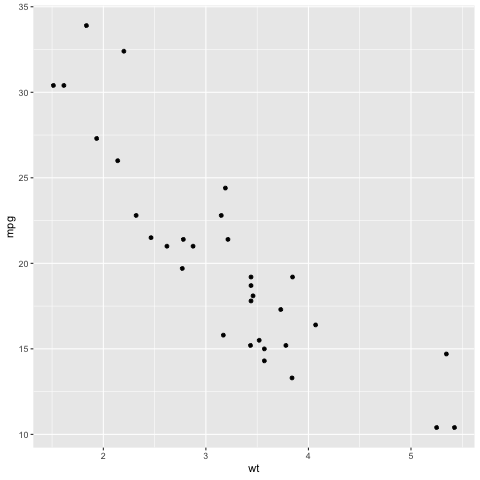

In [35]:
%%R
ggplot(data=cars, mapping=aes(x=wt, y=mpg)) +
geom_point()